## Due Data: Dec. 1st

# Assignment 5

In this assignment, you are required to pick 2 machine learning models of your choice and then apply it to model the credit risk using `German Credit Risk`data. Do not forget to explain/interpret the steps you follow.

In [1]:
import pandas as pd
credit = pd.read_csv('/content/credit_data_risk.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [3]:
del credit['Unnamed: 0']

In [4]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
import matplotlib.pyplot as plt
numerical_credit = credit.select_dtypes(exclude='O')

In [6]:
numerical_credit

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


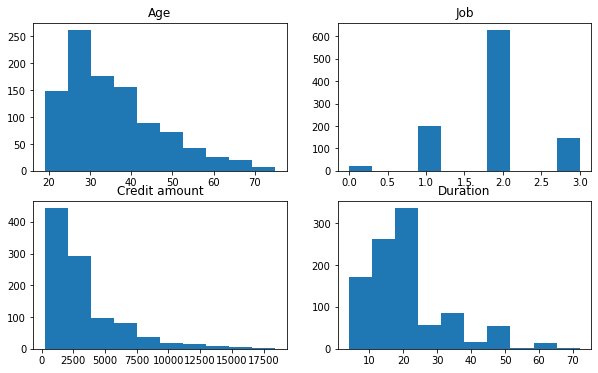

In [7]:
plt.figure(figsize=(10, 6))
k = 0
for i, j in enumerate(numerical_credit):
    k+=1
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(str(j))

In [8]:
numerical_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   Job            1000 non-null   int64
 2   Credit amount  1000 non-null   int64
 3   Duration       1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [10]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [11]:
distance = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

The elbow method, as a first method, is introduced in the following code snippet. To find the optimal number of clusters, we observe the slope of the curve and decide the cut-off point at which the curve gets flatter—that is, the slope of the curve gets lower. As it gets flatter, the inertia, telling us how far away the points within a cluster are located, decreases, which is nice for the purpose of clustering. On the other hand, as we allow inertia to decrease, the number of clusters increases, which makes the analysis more complicated. Given that trade-off, the stopping criteria is the point where the curve gets flatter. 

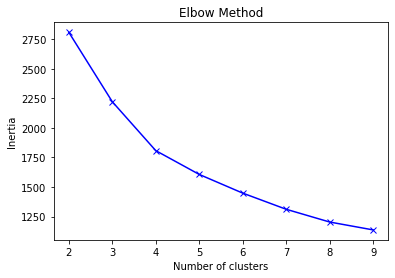

In [12]:
no_cluster = range(2, 10)
plt.plot(no_cluster, distance, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit_predict(scaled_credit)

In [14]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [15]:
credit.head()# risk variable is the ground truth

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,clusters
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,male,2,free,little,little,4870,24,car,bad,0


In [16]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [17]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit Amount', 'Duration', 'Clusters', 'Risk']

In [18]:
df_scaled.head()

,Age,Job,Credit Amount,Duration,Clusters,Risk
0,2.766456,0.146949,-0.745131,-1.236478,0,good
1,-1.191404,0.146949,0.949817,2.248194,1,bad
2,1.183312,-1.383771,-0.416562,-0.738668,0,good
3,0.831502,0.146949,1.634247,1.750384,1,good
4,1.535122,0.146949,0.566664,0.256953,0,bad


In [19]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

good    573
bad     193
Name: Risk, dtype: int64

In [20]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

good    127
bad     107
Name: Risk, dtype: int64

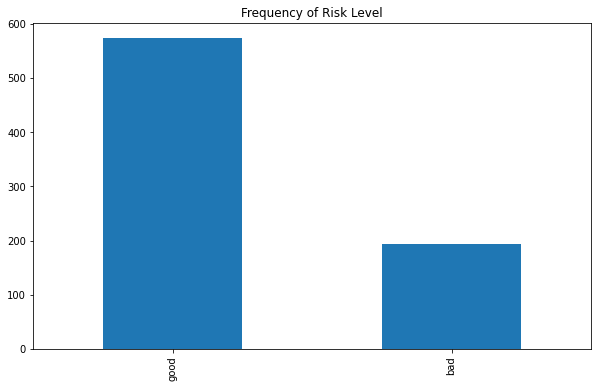

In [21]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level');

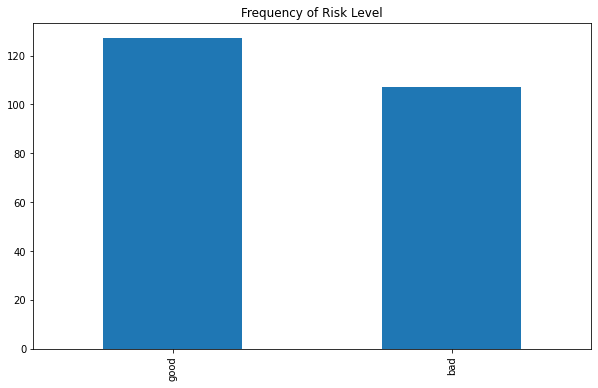

In [22]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level');

At this point, let’s take a step back and focus on entirely different problem: class imbalance. In credit risk analysis, it is not uncommon to have a class imbalance prob‐ lem. Class imbalance arises when one class dominates over another. To illustrate, in our case, given the data obtained from the first cluster, we have 576 customers with a good credit record and 195 customers with a bad one. As can be readily observed, customers with good credit records dominate over customers with bad records; that is basically what we refer to as a class imbalance.


There are numerous ways to handle this issue: up-sampling, down-sampling, the syn‐ thetic minority over-sampling technique (SMOTE), and the edited nearest neighbor rule (ENN). To take advantage of a hybrid approach, we’ll incorporate a combination of SMOTE and ENN so we can clean the unwanted overlapping observations between classes, which will help us to detect the optimal balancing ratio and, in turn, boost the predictive performance (Tuong et al., 2018). Converting imbalanced data into balanced data will be our first step in predicting the probability of default, but please note that we will merely apply this technique to the data obtained from the first cluster.

In [23]:
credit['clusters'].value_counts()# 0: good and 1: bad

0    766
1    234
Name: clusters, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good':0, 'bad':1})

In [26]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk','Clusters']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Age,Job,Credit Amount,Duration,Clusters
29,2.414647,0.146949,1.263499,3.243815,1
535,-0.223927,0.146949,-0.337522,0.008048,0
695,1.271265,0.146949,-0.721384,-1.236478,0
557,-0.575737,0.146949,0.613804,0.008048,0
836,-1.279356,0.146949,-0.845439,-0.738668,0
...,...,...,...,...,...
106,0.303788,1.677670,1.129520,-0.240857,1
270,-0.311879,0.146949,-0.215947,-0.240857,0
860,-0.751642,0.146949,0.897714,0.256953,1
435,-0.927547,0.146949,-0.633482,-0.738668,0


For this assignment I am taking two machine learning models which are K Nearest neighbours and gaussian naive bayes

## K Nearest neighbours for PD Estimation

In [29]:
first_cluster_train = X_train[X_train.Clusters==0].iloc[:,:-1]
second_cluster_train = X_train[X_train.Clusters==1].iloc[:,:-1]

In [30]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters==0]['Risk']

In [31]:
first_cluster_test = X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test = X_test[X_test.Clusters==1].iloc[:,:-1]

In [32]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters==0]['Risk']

In [33]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In K Neighbours we have to take n_neighbours for that I have created for loop and find n_neighbours which have high acuuracy

In [34]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train1,y_train1)
  y_pred = knn.predict(X_test1)
  scores[k] = metrics.accuracy_score(y_test1,y_pred)
  scores_list.append(metrics.accuracy_score(y_test1,y_pred))
print(scores)
print(scores_list)


{1: 0.6319018404907976, 2: 0.7423312883435583, 3: 0.6748466257668712, 4: 0.7361963190184049, 5: 0.7239263803680982, 6: 0.7300613496932515, 7: 0.7177914110429447, 8: 0.7423312883435583, 9: 0.7177914110429447, 10: 0.7300613496932515, 11: 0.7300613496932515, 12: 0.7423312883435583, 13: 0.7484662576687117, 14: 0.7484662576687117, 15: 0.7423312883435583, 16: 0.7423312883435583, 17: 0.7423312883435583, 18: 0.7423312883435583, 19: 0.7484662576687117, 20: 0.7484662576687117, 21: 0.7484662576687117, 22: 0.7484662576687117, 23: 0.7484662576687117, 24: 0.7484662576687117, 25: 0.7484662576687117}
[0.6319018404907976, 0.7423312883435583, 0.6748466257668712, 0.7361963190184049, 0.7239263803680982, 0.7300613496932515, 0.7177914110429447, 0.7423312883435583, 0.7177914110429447, 0.7300613496932515, 0.7300613496932515, 0.7423312883435583, 0.7484662576687117, 0.7484662576687117, 0.7423312883435583, 0.7423312883435583, 0.7423312883435583, 0.7423312883435583, 0.7484662576687117, 0.7484662576687117, 0.74846

Text(0, 0.5, 'Testing Accuracy')

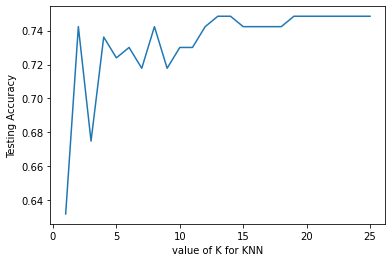

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=2)

In [37]:
pred_prob1 = knn.predict(X_test1)

In [38]:
print(pred_prob1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [39]:
print(y_test1.values)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0]


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

Text(91.68, 0.5, 'Predicted')

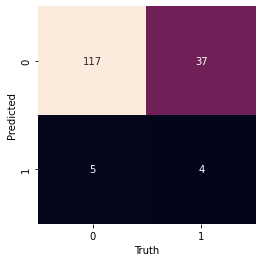

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(pred_prob1, y_test1)
values = np.unique(pred_prob1)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=values, yticklabels=values)
plt.xlabel('Truth')
plt.ylabel('Predicted')


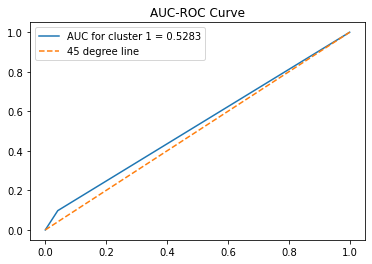

In [41]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos, true_pos, label='AUC for cluster 1 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()


In what follows, prediction analysis is conducted by creating different datasets based on clusters. For the sake of testing, the following analysis is done with test data, and results in the following figure:

Similar to what we did with the first set of test data, we create a second set of test data to run the prediction to draw the ROC-AUC curve:

In [42]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters==1]['Risk']

In [43]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']

In [44]:
k_range_2 = range(1,26)
scores_2 = {}
scores_list_2 = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train2,y_train2)
  y_pred = knn.predict(X_test2)
  scores_2[k] = metrics.accuracy_score(y_test2,y_pred)
  scores_list_2.append(metrics.accuracy_score(y_test2,y_pred))
print(scores_2)
print(scores_list_2)

{1: 0.5675675675675675, 2: 0.5945945945945946, 3: 0.6486486486486487, 4: 0.5405405405405406, 5: 0.6216216216216216, 6: 0.5405405405405406, 7: 0.5675675675675675, 8: 0.6216216216216216, 9: 0.5405405405405406, 10: 0.5675675675675675, 11: 0.5945945945945946, 12: 0.5675675675675675, 13: 0.6486486486486487, 14: 0.6216216216216216, 15: 0.6756756756756757, 16: 0.5945945945945946, 17: 0.6486486486486487, 18: 0.6216216216216216, 19: 0.7027027027027027, 20: 0.6756756756756757, 21: 0.6216216216216216, 22: 0.6216216216216216, 23: 0.6486486486486487, 24: 0.6216216216216216, 25: 0.6216216216216216}
[0.5675675675675675, 0.5945945945945946, 0.6486486486486487, 0.5405405405405406, 0.6216216216216216, 0.5405405405405406, 0.5675675675675675, 0.6216216216216216, 0.5405405405405406, 0.5675675675675675, 0.5945945945945946, 0.5675675675675675, 0.6486486486486487, 0.6216216216216216, 0.6756756756756757, 0.5945945945945946, 0.6486486486486487, 0.6216216216216216, 0.7027027027027027, 0.6756756756756757, 0.62162

Text(0, 0.5, 'Testing Accuracy')

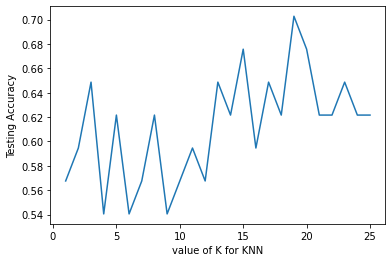

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range_2,scores_list_2)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing Accuracy')

In [46]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=2)

In [47]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']
pred_prob2 = knn.predict(X_test2)

In [48]:
print(pred_prob2)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0]


In [49]:
print(y_test2.values)

[0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0]


Text(91.68, 0.5, 'Predicted')

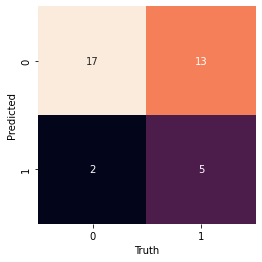

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(pred_prob2, y_test2)
values = np.unique(y_test2)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=values, yticklabels=values)
plt.xlabel('Truth')
plt.ylabel('Predicted')


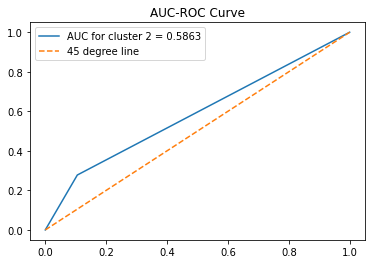

In [50]:
false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos, true_pos, label='AUC for cluster 2 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()


## Gaussian Naive Bayes 

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
nb.fit(X_train1,y_train1)

GaussianNB()

In [53]:
pred_prob3 = nb.predict(X_test1)

In [81]:
print(pred_prob3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [55]:
pred_prob3.shape

(163,)

In [80]:
print(y_test1.values)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0]


Text(91.68, 0.5, 'Predicted')

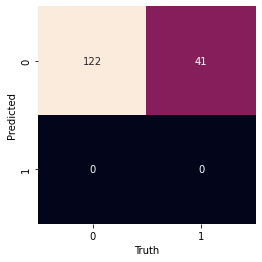

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(pred_prob3, y_test1)
values = np.unique(y_test1)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=values, yticklabels=values)
plt.xlabel('Truth')
plt.ylabel('Predicted')


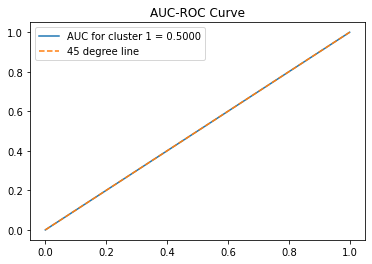

In [57]:
false_pos, true_pos, _ = roc_curve(y_test1.values, pred_prob3)
auc = roc_auc_score(y_test1, pred_prob3)
plt.plot(false_pos, true_pos, label='AUC for cluster 1 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

In [58]:
gaussianNbscore = metrics.accuracy_score(y_test1,pred_prob3)

In [59]:
print(gaussianNbscore)

0.7484662576687117


In [60]:
print("Number of mislabeled points out of a total %d points for training set: %d" % (X_test1.shape[0],(y_test1 != pred_prob3).sum()))

Number of mislabeled points out of a total 163 points for training set: 41


In [61]:
nb.fit(X_train2,y_train2)

GaussianNB()

In [62]:
pred_prob4 = nb.predict(X_test2)

In [63]:
print(pred_prob4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1]


In [64]:
print(y_test2.values)

[0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0]


Text(91.68, 0.5, 'Predicted')

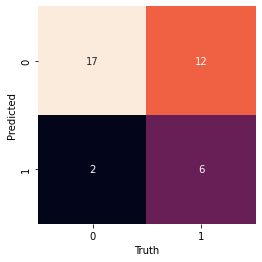

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(pred_prob4, y_test2)
values = np.unique(y_test2)

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, xticklabels=values, yticklabels=values)
plt.xlabel('Truth')
plt.ylabel('Predicted')


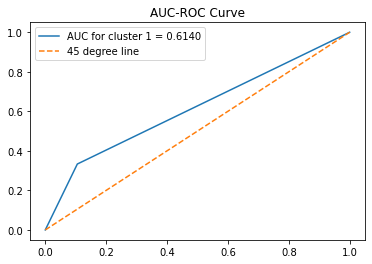

In [65]:
false_pos, true_pos, _ = roc_curve(y_test2.values, pred_prob4)
auc = roc_auc_score(y_test2, pred_prob4)
plt.plot(false_pos, true_pos, label='AUC for cluster 1 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

In [66]:
gaussianNbscore2 = metrics.accuracy_score(y_test2,pred_prob4)

In [67]:
print(gaussianNbscore2)

0.6216216216216216


In [68]:
print("Number of mislabeled points out of a total %d points for training set: %d" % (X_test2.shape[0],(y_test2 != pred_prob4).sum()))

Number of mislabeled points out of a total 37 points for training set: 14
